# EDA - OCR Dataset Analysis 

This notebook explores the OCR dataset in `data/trainset` and `data/testset`. We will check:
1. Sample images and labels.
2. Character distribution.
3. Image dimension statistics.
4. Label length distribution.

In [1]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from collections import Counter
import numpy as np

data_root = "/home/namdv/workspace/CRNN_OCR/data"
train_dir = os.path.join(data_root, "trainset")
test_dir = os.path.join(data_root, "testset")

def get_image_files(directory):
    return glob.glob(os.path.join(directory, "*.jpeg")) + glob.glob(os.path.join(directory, "*.jpg"))

train_files = get_image_files(train_dir)
test_files = get_image_files(test_dir)

print(f"Number of training images: {len(train_files)}")
print(f"Number of test images: {len(test_files)}")

Number of training images: 26155
Number of test images: 100


## 1. Inspect Samples
We assume the filename (without extension) is the label.

Training Samples:


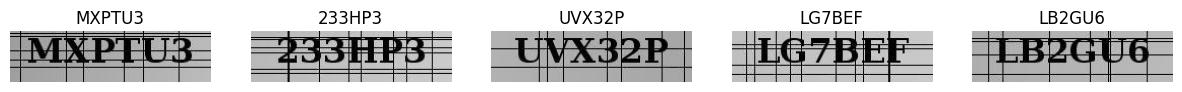

Test Samples:


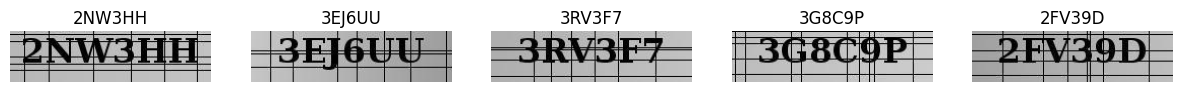

In [2]:
def show_samples(img_paths, num_samples=5):
    plt.figure(figsize=(15, 3))
    for i, path in enumerate(img_paths[:num_samples]):
        img = Image.open(path)
        label = os.path.splitext(os.path.basename(path))[0]
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

print("Training Samples:")
show_samples(train_files)

print("Test Samples:")
show_samples(test_files)

## 2. Character Set Construction
Let's collect all unique characters to build our vocabulary.

In [3]:
all_labels = [os.path.splitext(os.path.basename(p))[0] for p in train_files + test_files]
all_chars = sorted(list(set("".join(all_labels))))
print(f"Unique characters ({len(all_chars)}): {all_chars}")

Unique characters (38): ['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'c', 'j', 's', 'u', 'w', 'x', 'y']


## 3. Label Length Distribution
Important for defining max sequence length.

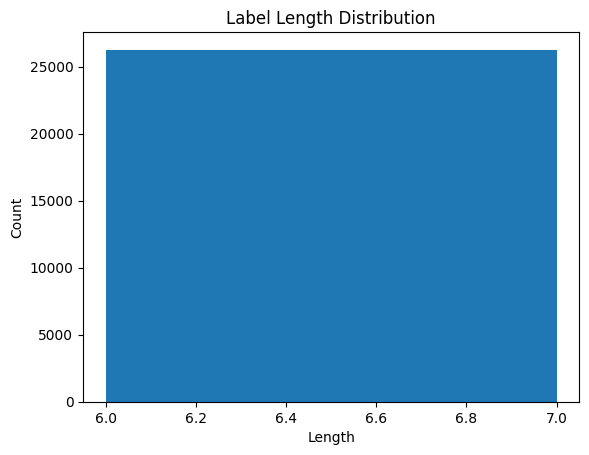

Max label length: 6


In [4]:
lengths = [len(label) for label in all_labels]
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2))
plt.title("Label Length Distribution")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()
print(f"Max label length: {max(lengths)}")

## 4. Image Dimensions
Check width and height to decide on resize strategy.

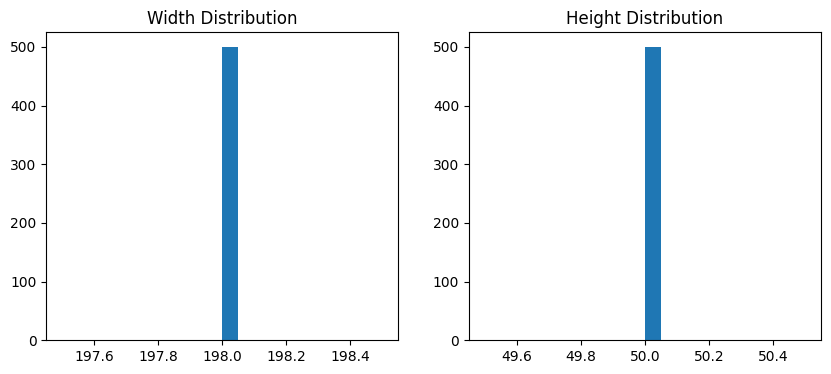

Mean Width: 198.00, Max Width: 198
Mean Height: 50.00, Max Height: 50


In [5]:
widths = []
heights = []
for path in train_files[:500]: # Sample 500 for speed
    w, h = Image.open(path).size
    widths.append(w)
    heights.append(h)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20)
plt.title("Width Distribution")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20)
plt.title("Height Distribution")
plt.show()

print(f"Mean Width: {np.mean(widths):.2f}, Max Width: {np.max(widths)}")
print(f"Mean Height: {np.mean(heights):.2f}, Max Height: {np.max(heights)}")